Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# IPL Matches Dataset Overview

The IPL matches dataset provides a summary of the details for each match played in the Indian Premier League (IPL). This dataset includes information about the teams, match outcomes, and other relevant details for each game.

## General Information:
- **Total Records:** 756 entries
- **Total Columns:** 18

## Columns Description:
- **id:** Unique identifier for each match.
- **season:** The season/year of the IPL.
- **city:** The city where the match was played.
- **date:** The date when the match took place.
- **team1:** The first team participating in the match.
- **team2:** The second team participating in the match.
- **toss_winner:** The team that won the toss.
- **toss_decision:** The decision made by the toss winner (field or bat).
- **result:** The result of the match (normal, tie, no result).
- **dl_applied:** Indicates if the Duckworth-Lewis method was applied (0 or 1).
- **winner:** The team that won the match.
- **win_by_runs:** The number of runs by which the match was won (if applicable).
- **win_by_wickets:** The number of wickets by which the match was won (if applicable).
- **player_of_match:** The player awarded as the player of the match.
- **venue:** The venue where the match was played.
- **umpire1:** The name of the first umpire.
- **umpire2:** The name of the second umpire.
- **umpire3:** The name of the third umpire (if applicable).


In [2]:
# Load the dataset
matches_df = pd.read_csv('C:\\Users\\anonymous\\Desktop\\TSF GRIP Task\\Indian Premier League\\matches.csv')

# Display the first few rows of the dataset to understand its structure
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#shape calculate of match data set
matches_df.shape

(756, 18)

In [4]:
# Display basic information about the dataset
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# IPL Deliveries Dataset Overview

The IPL deliveries dataset provides comprehensive ball-by-ball details of Indian Premier League (IPL) matches. This extensive dataset includes various aspects of each delivery, covering the participating teams, players, outcomes of deliveries, and more.

## General Information:
- **Total Records:** 179,078 entries
- **Total Columns:** 21

## Columns Description:
- **match_id:** A unique identifier for each match.
- **inning:** The inning number (1 or 2).
- **batting_team:** The team currently batting.
- **bowling_team:** The team currently bowling.
- **over:** The over number in the match.
- **ball:** The ball number within the over.
- **batsman:** The name of the batsman facing the delivery.
- **non_striker:** The name of the batsman at the non-striker end.
- **bowler:** The name of the bowler delivering the ball.
- **is_super_over:** Indicates if the delivery is part of a super over (binary: 0 or 1).
- **wide_runs:** Runs scored off wide deliveries.
- **bye_runs:** Runs scored off byes.
- **legbye_runs:** Runs scored off leg byes.
- **noball_runs:** Runs scored off no-balls.
- **penalty_runs:** Runs awarded as penalty.
- **batsman_runs:** Runs scored by the batsman from the delivery.
- **extra_runs:** Total extra runs conceded (sum of wide, bye, legbye, noball, and penalty runs).
- **total_runs:** Total runs scored from the delivery (batsman_runs + extra_runs).
- **player_dismissed:** Name of the dismissed player, if any.
- **dismissal_kind:** Type of dismissal (e.g., caught, bowled, etc.).
- **fielder:** Name of the fielder involved in the dismissal, if any.


In [5]:
# Load the dataset
deliveries_df = pd.read_csv('C:\\Users\\anonymous\\Desktop\\TSF GRIP Task\\Indian Premier League\\deliveries.csv')

# Display the first few rows of the dataset to understand its structure
deliveries_df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
#shape calculate of deleveries data set
deliveries_df.shape

(179078, 21)

In [7]:
# Display basic information about the dataset
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
# Check for missing values in the matches dataset
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [9]:
# Check for missing values in the matches dataset
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Issues with the IPL Matches and Deliveries Datasets

## Missing Values:

### Deliveries Dataset:
- **player_dismissed:** Missing values because not every delivery results in a dismissal.
- **dismissal_kind:** Missing values for the same reason as player_dismissed.
- **fielder:** Missing values when no fielder is involved in the dismissal.

### Matches Dataset:
- **city:** 7 missing entries.
- **winner:** 4 missing entries.
- **player_of_match:** 4 missing entries.
- **umpire1:** 2 missing entries.
- **umpire2:** 2 missing entries.
- **umpire3:** 637 missing entries (often umpire3 is not present).


Drop the unnecessary Column

In [11]:
# Drop the umpire3 column
matches_df.drop(columns=['umpire3'], inplace=True)

# Check for remaining missing values in the dataset
matches_df.isnull().sum()


id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [12]:
# Drop the dismissal-related columns with inplace=True
deliveries_df.drop(columns=['player_dismissed', 'dismissal_kind', 'fielder'], inplace=True)

# Check the structure of the modified dataset to confirm the columns have been dropped
deliveries_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

In [13]:
# Clean the matches dataset
# Fill missing city values based on the venue
venue_city_mapping = {
    "Dubai International Cricket Stadium": "Dubai",
    # Add more mappings as necessary
}

matches_df['city'] = matches_df.apply(
    lambda row: venue_city_mapping.get(row['venue'], row['city']) if pd.isnull(row['city']) else row['city'],
    axis=1
)

# Replace missing values in the winner column with 'Match Cancelled' where matches were canceled due to rain
matches_df['winner'] = matches_df.apply(
    lambda row: 'Match Cancelled' if pd.isnull(row['winner']) else row['winner'],
    axis=1
)

# Fill missing values in the player_of_match column with 'No Award'
matches_df['player_of_match'].fillna('No Award', inplace=True)

# Replace missing values in the umpire1 column with 'Sundaram Ravi'
matches_df['umpire1'].fillna('Sundaram Ravi', inplace=True)

# Replace missing values in the umpire2 column with 'Virender Sharma'
matches_df['umpire2'].fillna('Virender Sharma', inplace=True)



C:\Users\anonymous\AppData\Local\Temp\ipykernel_7068\4137537910.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_df['player_of_match'].fillna('No Award', inplace=True)
C:\Users\anonymous\AppData\Local\Temp\ipykernel_7068\4137537910.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [14]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(5), object(12)
memory usag

# Cleaned Datasets Summary

## Deliveries Dataset
- **Columns:** match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs
- **Removed Columns:** player_dismissed, dismissal_kind, fielder
- **Status:** No missing values

## Matches Dataset
- **Columns:** id, season, city, date, team1, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpire1, umpire2
- **Handled Missing Values:**
  - **city:** filled based on venue
  - **winner:** filled with "Match Cancelled" where applicable
  - **player_of_match:** filled with "No Award"
  - **umpire1:** filled with "Sundaram Ravi"
  - **umpire2:** filled with "Virender Sharma"
- **Status:** No missing values

# EDA

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

## Why do EDA
- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- Feature engineering
- Detecting outliers

In [15]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [16]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


Step 1: Identify the Most Successful Team

Total Wins by Team:
 winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Match Cancelled                  4
Name: count, dtype: int64
Most Successful Team: Mumbai Indians


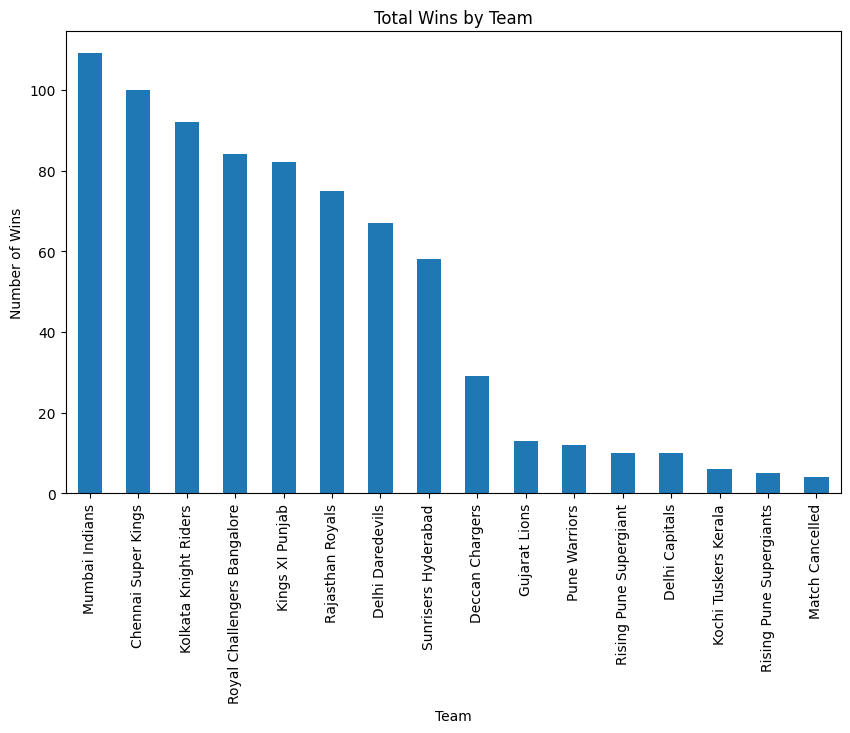

In [20]:
# Calculate total number of wins for each team
team_wins = matches_df['winner'].value_counts()
print("Total Wins by Team:\n", team_wins)

# Identify the team with the most wins
most_successful_team = team_wins.idxmax()
print("Most Successful Team:", most_successful_team)

# Plot total wins by team
plt.figure(figsize=(10, 6))
team_wins.plot(kind='bar')
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

Step 2: Identify the Most Successful Batsmen

Total Runs by Batsmen:
 batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64
Most Successful Batsman: V Kohli


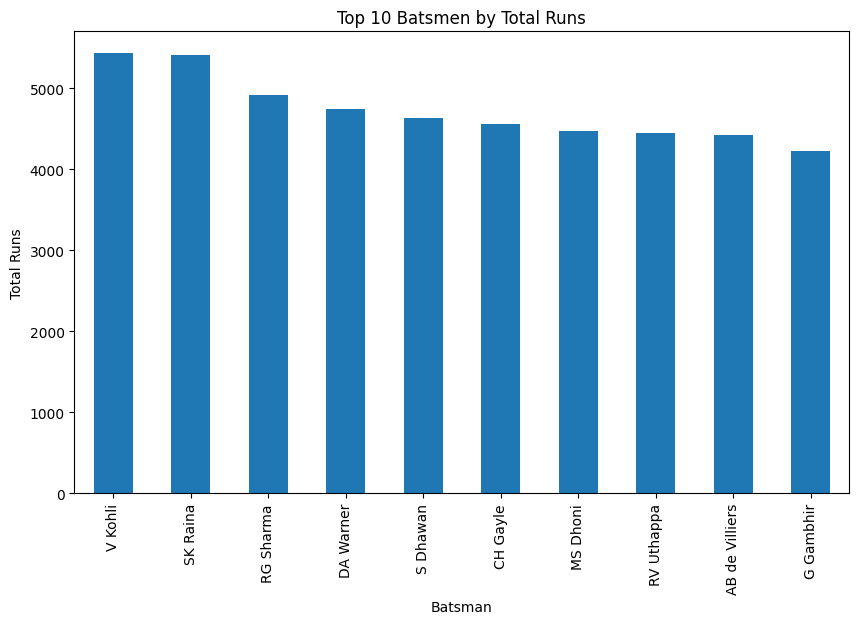

In [21]:
# Calculate total runs scored by each batsman
batsman_runs = deliveries_df.groupby('batsman')['batsman_runs'].sum()
print("Total Runs by Batsmen:\n", batsman_runs.sort_values(ascending=False).head(10))

# Identify the batsman with the highest total runs
top_batsman = batsman_runs.idxmax()
print("Most Successful Batsman:", top_batsman)

# Plot top 10 batsmen by runs
plt.figure(figsize=(10, 6))
batsman_runs.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()

Step 3: Factors Contributing to Win or Loss

Toss Decisions

Impact of Toss Decision:
 col_0          False  True 
toss_decision              
bat              159    134
field            204    259


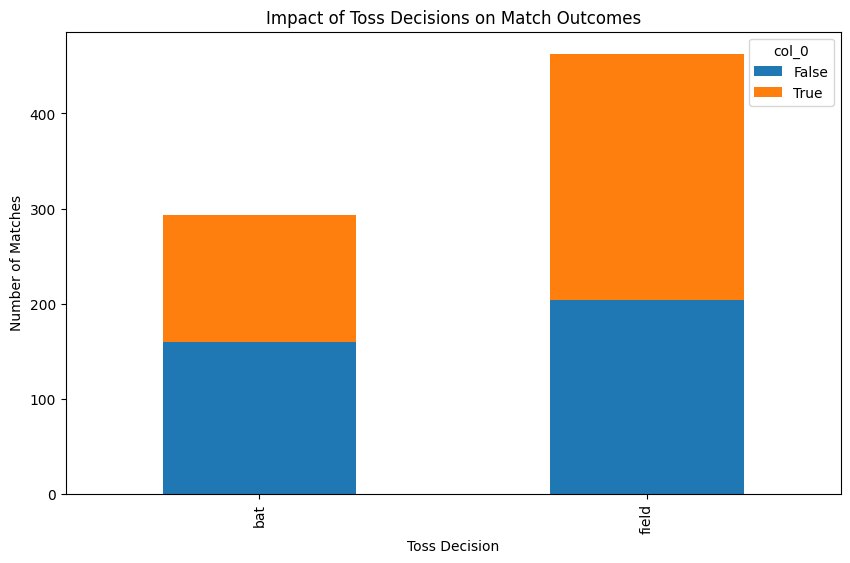

In [23]:
# Analyze the impact of toss decisions on match outcomes
toss_impact = pd.crosstab(matches_df['toss_decision'], matches_df['winner'] == matches_df['toss_winner'])
print("Impact of Toss Decision:\n", toss_impact)

# Plot the impact of toss decisions
toss_impact.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Impact of Toss Decisions on Match Outcomes')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()

Winning Margin

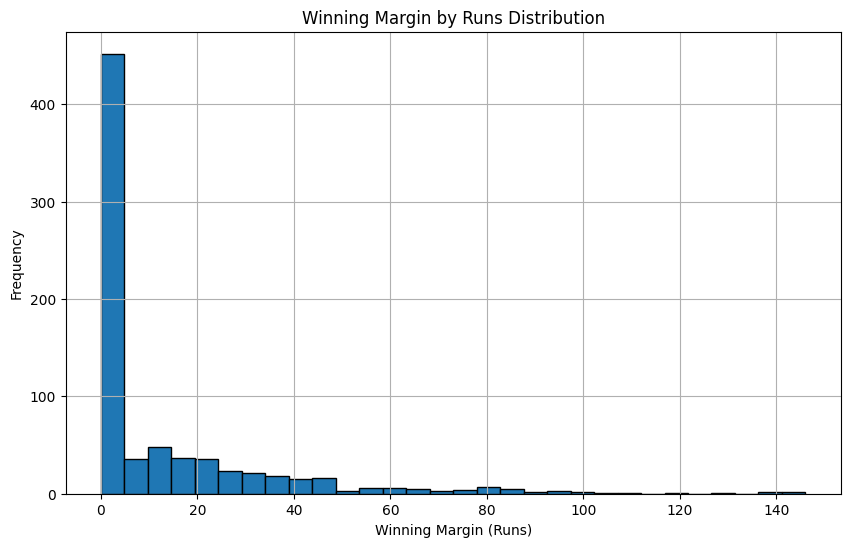

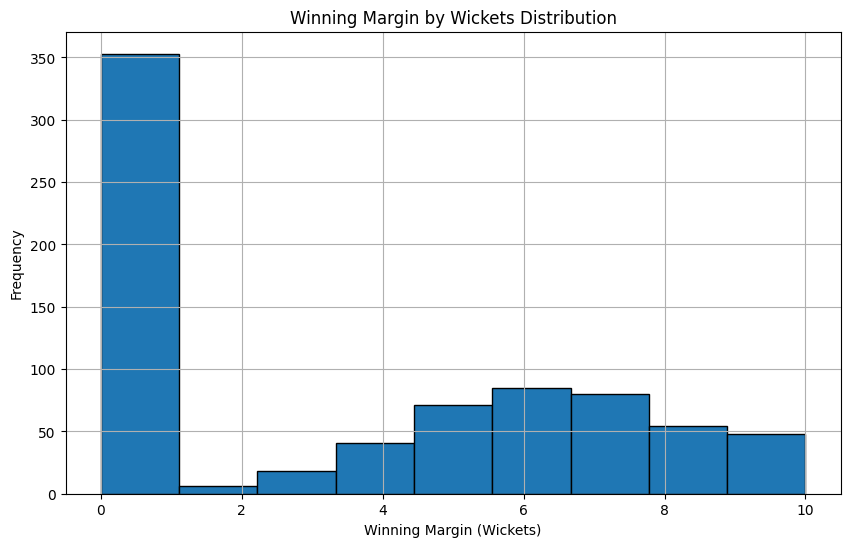

In [24]:
# Analyze the impact of winning margin (runs)
plt.figure(figsize=(10, 6))
matches_df['win_by_runs'].hist(bins=30, edgecolor='black')
plt.title('Winning Margin by Runs Distribution')
plt.xlabel('Winning Margin (Runs)')
plt.ylabel('Frequency')
plt.show()

# Analyze the impact of winning margin (wickets)
plt.figure(figsize=(10, 6))
matches_df['win_by_wickets'].hist(bins=9, edgecolor='black')
plt.title('Winning Margin by Wickets Distribution')
plt.xlabel('Winning Margin (Wickets)')
plt.ylabel('Frequency')
plt.show()

Venue Impact

Wins by Venue:
 winner                                              Chennai Super Kings  \
venue                                                                     
ACA-VDCA Stadium                                                    1.0   
Barabati Stadium                                                    0.0   
Brabourne Stadium                                                   1.0   
Buffalo Park                                                        1.0   
De Beers Diamond Oval                                               1.0   
Dr DY Patil Sports Academy                                          3.0   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...                  1.0   
Dubai International Cricket Stadium                                 2.0   
Eden Gardens                                                        5.0   
Feroz Shah Kotla                                                    5.0   
Feroz Shah Kotla Ground                                             1.0   
Green Par

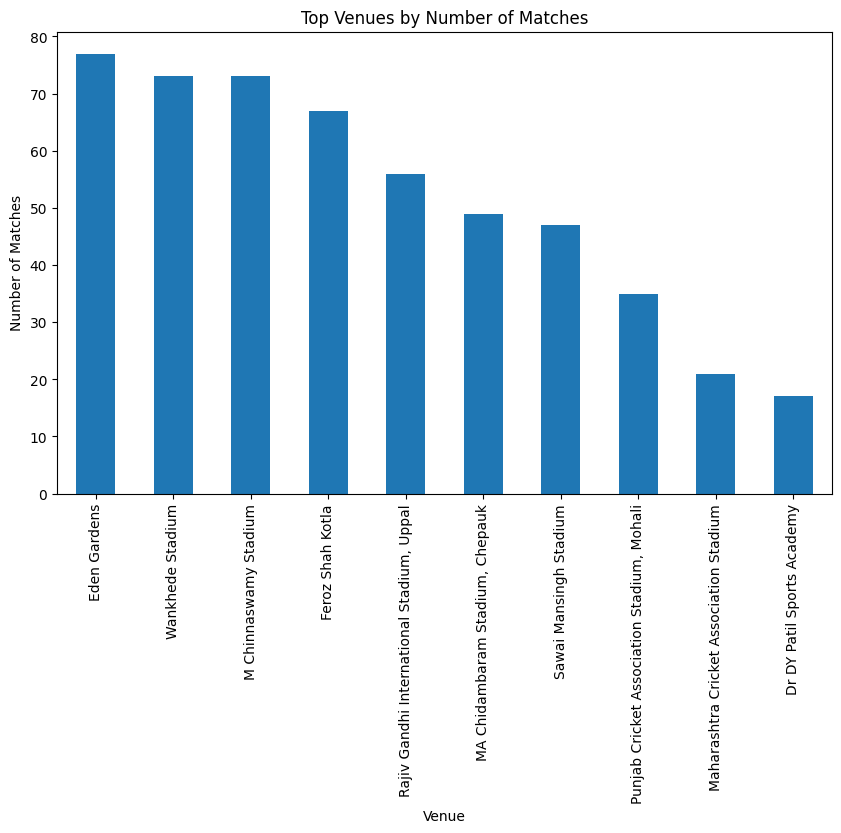

In [25]:
# Analyze the impact of different venues
venue_wins = matches_df.groupby('venue')['winner'].value_counts().unstack().fillna(0)
print("Wins by Venue:\n", venue_wins)

# Plot the impact of venues
venue_wins.sum(axis=1).sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top Venues by Number of Matches')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.show()

# Suggest Team or Players a Company Should Endorse for its Product

## Team Recommendation
**Mumbai Indians**

**Reason:** Mumbai Indians have consistently performed well in the IPL, winning the most titles. Their strong team performance and large fan base make them an excellent choice for endorsement.

## Player Recommendation
**Virat Kohli**

**Reason:** Virat Kohli is one of the top-performing batsmen with a significant number of runs in the IPL. He is highly popular and has a strong presence both on and off the field, making him an ideal choice for endorsement.

## Summary
- **Team to Endorse:** Mumbai Indians
- **Player to Endorse:** Virat Kohli

In [26]:
# Team Recommendation
team_wins = matches_df['winner'].value_counts()
most_successful_team = team_wins.idxmax()

# Player Recommendation
batsman_runs = deliveries_df.groupby('batsman')['batsman_runs'].sum()
top_batsman = batsman_runs.idxmax()

print("Most Successful Team:", most_successful_team)
print("Most Successful Batsman:", top_batsman)

Most Successful Team: Mumbai Indians
Most Successful Batsman: V Kohli
